# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Inspect the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


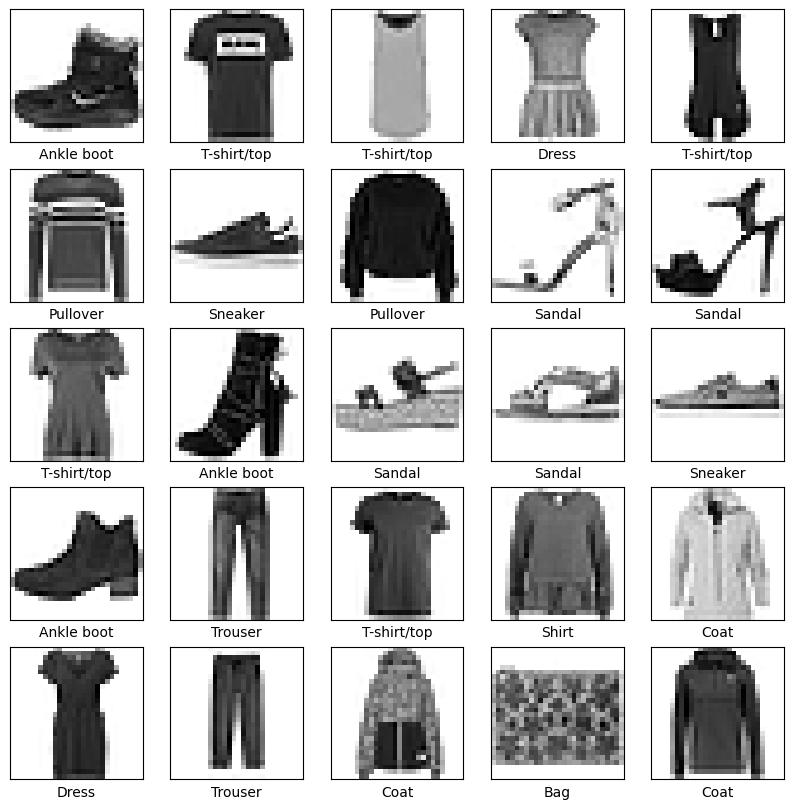

In [3]:
import matplotlib.pyplot as plt
# Verify the data looks as expected

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

The images look as expected, but the quality is quite poor for 28x28 pixels. They do have their labels. 

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Create a simple linear regression model
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Flatten 2D images to 1D vectors
model.add(Dense(10))  # Output layer with 10 units (one per class), no activation

# Compile the model using categorical crossentropy loss and an optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/10


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.1670 - loss: 10.1805 - val_accuracy: 0.2373 - val_loss: 10.6971
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - accuracy: 0.2444 - loss: 10.2912 - val_accuracy: 0.2577 - val_loss: 8.7682
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.2612 - loss: 9.1299 - val_accuracy: 0.2210 - val_loss: 7.9543
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 412us/step - accuracy: 0.2485 - loss: 9.2186 - val_accuracy: 0.1998 - val_loss: 10.5574
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 378us/step - accuracy: 0.2300 - loss: 9.3427 - val_accuracy: 0.2925 - val_loss: 10.4956
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.2664 - loss: 9.2357 - val_accuracy: 0.2468 - val_loss: 9.2090
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.2345 - loss: 9.4558 - val_accuracy: 0.1905 - val_loss: 8.3760
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 383us/step - accuracy: 0.1967 - loss:

In [5]:
print(f"Baseline model test accuracy: {test_acc:.4f}")

Baseline model test accuracy: 0.1987


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

The baseline model achieved a test accuracy of 0.1987 (about 20%). This is only slightly better than random guessing (which would be 10% for 10 classes). This performance is lower than what I might have expected for a simple linear model. The lower accuracy could be due to the lack of an activation function in the output layer, or possibly an issue with data preprocessing or label encoding.

Overall, the low performance is because a linear model cannot capture the complex spatial patterns in image data. It treats each pixel independently and cannot learn local features, which are important for distinguishing between different clothing items.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [7]:
from keras.layers import Conv2D, Flatten, Dense

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"CNN model test accuracy: {test_acc:.4f}")

Epoch 1/10


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8106 - loss: 0.5368 - val_accuracy: 0.8780 - val_loss: 0.3296
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8976 - loss: 0.2877 - val_accuracy: 0.8938 - val_loss: 0.2996
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9124 - loss: 0.2445 - val_accuracy: 0.8935 - val_loss: 0.2969
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9234 - loss: 0.2147 - val_accuracy: 0.8923 - val_loss: 0.2969
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9314 - loss: 0.1958 - val_accuracy: 0.9007 - val_loss: 0.2923
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9375 - loss: 0.1752 - val_accuracy: 0.8948 - val_loss: 0.3130
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9437 - loss: 0.1563 - val_accuracy: 0.8925 - val_loss: 0.3191
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9491 - loss: 0.1412 - val_accurac

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

The CNN model achieved a test accuracy of 90% which is significantly better than the baseline model's 20%. This improvement is due to the CNN's ability to learn spatial hierarchies and local patterns in the image data, which are crucial for image classification tasks. 

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [8]:
# A. Test Hyperparameters
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense
import numpy as np

filter_values = [16, 32, 64]
hyperparam_results = []

for filters in filter_values:
    model = Sequential()
    model.add(Conv2D(filters, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    hyperparam_results.append({'filters': filters, 'test_acc': test_acc})

print("Hyperparameter tuning results (number of filters):")
for res in hyperparam_results:
    print(f"Filters: {res['filters']}, Test Accuracy: {res['test_acc']:.4f}")


/opt/miniconda3/envs/dsi_env/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Hyperparameter tuning results (number of filters):
Filters: 16, Test Accuracy: 0.8889
Filters: 32, Test Accuracy: 0.8999
Filters: 64, Test Accuracy: 0.9038


In [10]:
# B. Test presence or absence of regularization
from keras.layers import Dropout

regularization_results = []

for use_dropout in [False, True]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    if use_dropout:
        model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    regularization_results.append({'dropout': use_dropout, 'test_acc': test_acc})

print("\nRegularization results (Dropout):")
for res in regularization_results:
    print(f"Dropout: {res['dropout']}, Test Accuracy: {res['test_acc']:.4f}")


Regularization results (Dropout):
Dropout: False, Test Accuracy: 0.8992
Dropout: True, Test Accuracy: 0.8917


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

Increasing the number of filters in the convolutional layer improved the model's performance. The test accuracy increased from 0.8889 (16 filters) to 0.9038 (64 filters), showing that a higher number of filters helps the model learn more complex features from the images. Adding dropout regularization (with a rate of 0.5) slightly decreased the test accuracy from 0.8992 (no dropout) to 0.8917 (with dropout). This suggests that, for this simple model and training setup, dropout was not necessary and may have slightly hindered performance. Overall, the best performance was achieved with 64 filters and no dropout, resulting in a test accuracy of 0.9038. The improvement is mainly due to the increased model capacity from more filters, which allows the network to capture more detailed patterns in the data. Dropout did not help in this case, possibly because the model was not overfitting.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [11]:
# Compile the final model with the best hyperparameters and regularization techniques
# Best: 64 filters, no dropout

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

final_model = Sequential()
final_model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
final_model.add(Flatten())
final_model.add(Dense(10, activation='softmax'))

final_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Train the final model
final_history = final_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the final model
final_loss, final_acc = final_model.evaluate(X_test, y_test)
print(f"Final model test accuracy: {final_acc:.4f}")
print(f"Final model test loss: {final_loss:.4f}")

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8193 - loss: 0.5186 - val_accuracy: 0.8907 - val_loss: 0.3082
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8979 - loss: 0.2841 - val_accuracy: 0.8927 - val_loss: 0.3019
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9131 - loss: 0.2377 - val_accuracy: 0.8952 - val_loss: 0.2952
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9277 - loss: 0.2056 - val_accuracy: 0.8963 - val_loss: 0.2970
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9369 - loss: 0.1763 - val_accuracy: 0.8968 - val_loss: 0.3133
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9453 - loss: 0.1534 - val_accuracy: 0.8928 - val_loss: 0.3176
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9536 - loss: 0.1324 - val_accuracy: 0.9013 - val_loss: 0.3142
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9577 - loss: 0.1179 - 

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.